In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Flatten
from keras. layers import MaxPooling2D
from keras.layers import Dense
import numpy as np
from keras.layers import Dropout

In [2]:
model=Sequential()
model.add(Conv2D(60,(1,1),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(50,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(5,5)))
model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=4,activation='softmax'))

C:\Users\vikas\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 60)          │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 60)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 50)          │          27,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1800)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         461,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 521,758 (1.99 MB)

 Trainable params: 521,758 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,              # Shearing
    zoom_range=0.4,               # Zooming
    horizontal_flip=True,         # Horizontal flipping
    rotation_range=40,            # Random rotations
    width_shift_range=0.2,        # Random width shifts
    height_shift_range=0.2,       # Random height shifts
    brightness_range=[0.8, 1.2],  # Random brightness adjustments
    channel_shift_range=0.2,      # Random channel shifts
    fill_mode='nearest'           # Filling in newly created pixels
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    "E:/Derma_GAN/Skin_leison_dataset_with_gan",
    target_size=(64, 64),
    batch_size=30,
    class_mode='sparse'
)

test_set = test_datagen.flow_from_directory(
    "E:/Derma_GAN/testing_data",
    target_size=(64, 64),
    batch_size=10,
    class_mode='sparse'
)


Found 1976 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [5]:
# Verify train generator
for data_batch, labels_batch in training_set:
    print("Data batch shape:", data_batch.shape)
    print("Labels batch shape:", labels_batch.shape)
    break

# Verify test generator
for data_batch, labels_batch in test_set:
    print("Data batch shape:", data_batch.shape)
    print("Labels batch shape:", labels_batch.shape)
    break


Data batch shape: (30, 64, 64, 3)
Labels batch shape: (30,)
Data batch shape: (10, 64, 64, 3)
Labels batch shape: (10,)


In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
history=model.fit(training_set,steps_per_epoch =40,epochs =100)

Epoch 1/100


C:\Users\vikas\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 44s 910ms/step - accuracy: 0.3368 - loss: 1.3853
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 382ms/step - accuracy: 0.4036 - loss: 1.2717
Epoch 3/100


C:\ProgramData\Anaconda3\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


40/40 ━━━━━━━━━━━━━━━━━━━━ 37s 798ms/step - accuracy: 0.4473 - loss: 1.2101
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 372ms/step - accuracy: 0.4933 - loss: 1.1249
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 38s 837ms/step - accuracy: 0.4617 - loss: 1.1413
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 363ms/step - accuracy: 0.4751 - loss: 1.1283
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 36s 777ms/step - accuracy: 0.4863 - loss: 1.1485
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 358ms/step - accuracy: 0.4556 - loss: 1.1652
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 755ms/step - accuracy: 0.4656 - loss: 1.1188
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 364ms/step - accuracy: 0.4793 - loss: 1.1452
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 764ms/step - accuracy: 0.4963 - loss: 1.1183
Epoch 12/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 364ms/step - accuracy: 0.5029 - loss: 1.0938
Epoch 13/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 37s 799ms/step - accuracy: 0.5227 - loss: 1.0681
Epoch 14/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 

In [8]:
test_loss, test_accuracy = model.evaluate(test_set )
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 334ms/step - accuracy: 0.7251 - loss: 0.7313
Test Loss: 0.7144203186035156
Test Accuracy: 0.7200000286102295


40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step
[[33 23 21 23]
 [35 15 21 29]
 [24 18 27 31]
 [20 17 31 32]]


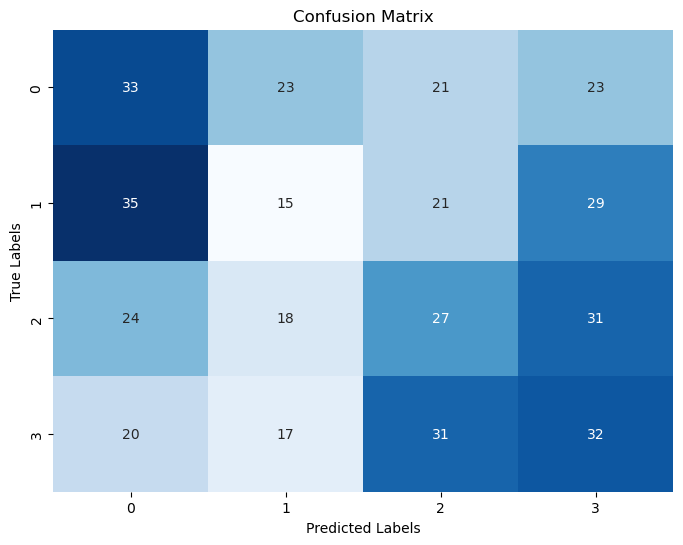

In [13]:
from sklearn.metrics import confusion_matrix

# Get true labels
true_labels = test_set.classes

# Generate predicted labels for all test images
predicted_labels = model.predict(test_set)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)
print(confusion_mat)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix with colormap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d', cbar=False)

# Set axis labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

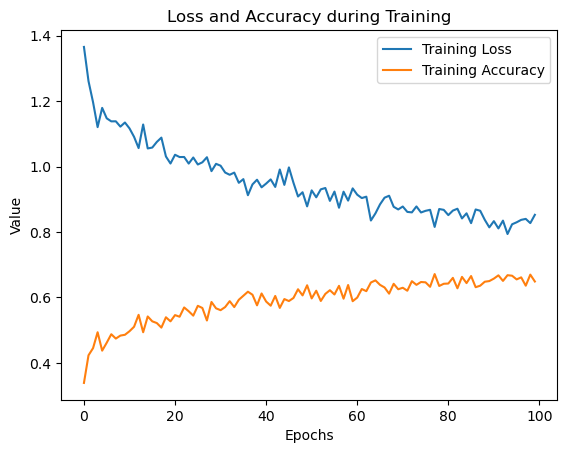

In [14]:
import matplotlib.pyplot as plt

# Get training history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']



# Plot loss and accuracy on the same graph

plt.plot(train_loss, label='Training Loss')
plt.plot(train_accuracy, label='Training Accuracy')



plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Loss and Accuracy during Training')
plt.legend()
plt.show()

In [15]:
# Save the entire model to a file
model.save('predictin_with_GAN_model.h5')
